# Distribuciones Estadísticas

Metodos Computacionales 1

Diego Useche Reyes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use('default')
plt.style.use('dark_background')

**Distribución discreta uniforme:**

La función densidad probabilidad para una distribución uniforme está dada por:

$$
f(x) = \begin{cases} \frac{1}{N} \quad \text{si} \quad x = 1, 2, ... , N \\ 0 \quad \text{en otro caso} \end{cases}
$$

**Distribución continua uniforme:**

La función densidad probabilidad para una distribución continua uniforme en el intervalo $[a, b]$ está dada por:

$$
f(x) = \begin{cases} \frac{1}{b-a} \quad \text{si} \quad a \leq x \leq b \\ 0 \quad \text{en otro caso} \end{cases}
$$

<ipython-input-2-44356224ed26>:9: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(x, y, use_line_collection = True)


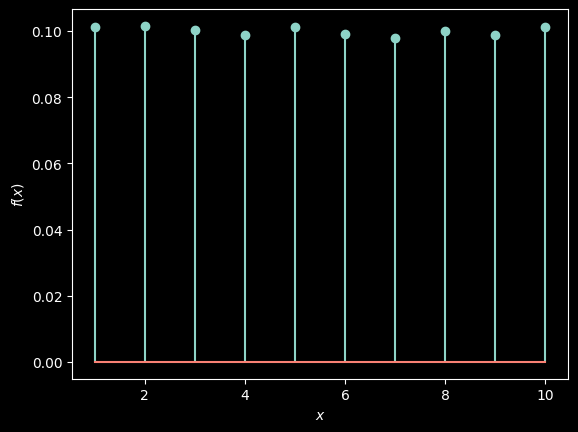

In [2]:
num_points = 100000
x = np.arange(1, 11)
y = np.zeros(10)
uni_dist = np.random.randint(1, 11, num_points)
for value in uni_dist:
    y[value - 1] += 1
y /= num_points

plt.stem(x, y, use_line_collection = True)
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.show()

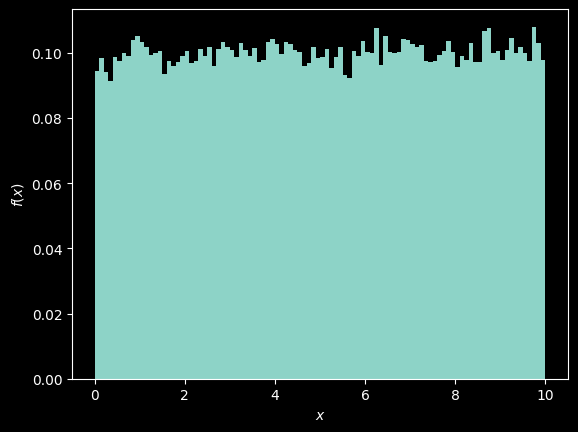

In [3]:
# Distribucion continua
num_points = 100000

y = np.random.rand(num_points)*10

plt.hist(y, bins = 100, density = True)
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.show()

**Distribución binomial:**

Una variable aleatoria $X$ tiene una distribución binomial de parámetros $n$ y $p$, si su función de densidad está dada por:

$$
f(x) = \begin{cases} {n \choose x}p^x(1-p)^{n-x} \quad \text{si} \quad x = 1, 2, ... , N \\ 0 \quad \text{en otro caso} \end{cases}
$$

<ipython-input-4-93abb1b9621a>:11: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(x, y, use_line_collection = True)


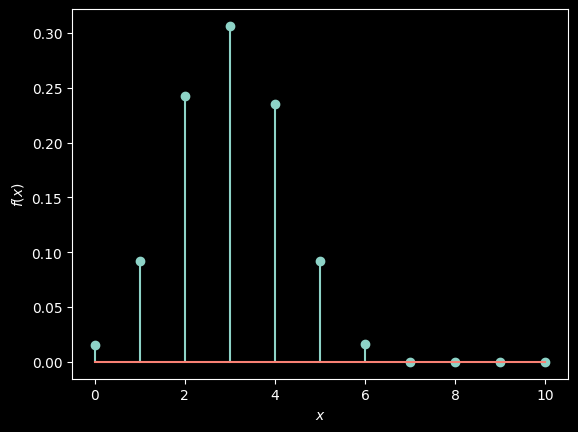

In [4]:
num_points = 10000
x = np.arange(0, 11)
y = np.zeros(11)
n = 6
p = 0.5
uni_dist = np.random.binomial(n, p, num_points)
for value in uni_dist:
    y[value] += 1
y /= num_points

plt.stem(x, y, use_line_collection = True)
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.show()

**Distribución de Poisson:**

Una variable aleatoria $X$ tiene una distribución de Poisson de parametro $\lambda > 0$, si su función de densidad está dada por:

$$
f(x) = \begin{cases} e^{-\lambda}\frac{\lambda^x}{x!} \quad \text{si} \quad x = 0, 1, 2, ... , N \\ 0 \quad \text{en otro caso} \end{cases}
$$

<ipython-input-5-0f1138e60121>:10: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(x, y, use_line_collection = True)


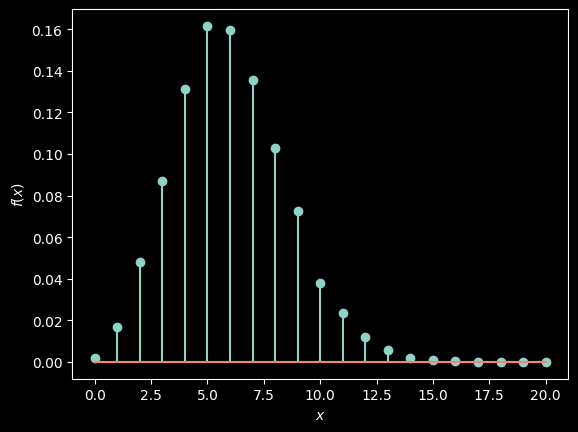

In [5]:
num_points = 10000
x = np.arange(0, 21)
y = np.zeros(21)
lambda_poisson = 6
uni_dist = np.random.poisson(lambda_poisson, num_points)
for value in uni_dist:
    y[value] += 1
y /= num_points

plt.stem(x, y, use_line_collection = True)
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.show()

**Ejemplo:**

Los accidentes de tránsito son eventos con poca probabilidad, por lo tanto pueden ser descritos mediante una distribución de Poisson. Si un 3 % de los accidentes de tránsito en cierta carretera son fatales. Calcule la probabilidad de que 4 de 200 accidentes ocurridos, en promedio, en un año, en esta carretera sean fatales. Compare este resultado con el que se puede obtener usando el modelo $P(k, \lambda) = e^{-\lambda}\frac{\lambda^k}{k!}$, donde $k$ es el número de veces que ocurre el evento y $\lambda$ la cantidad de veces que se espera ocurra el evento.

In [6]:
dist_poisson = np.random.poisson(6, 10000)
num_fours = 0
for value in dist_poisson:
    if value == 4:
        num_fours += 1

num_fours = num_fours / len(dist_poisson)
print(num_fours)

0.1338


In [7]:
np.exp(-6)*6**4/(np.math.factorial(4))

<ipython-input-7-e5a7909d6cd8>:1: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  np.exp(-6)*6**4/(np.math.factorial(4))


0.13385261753998337

**Distribución normal**

Una variable aleatoria $X$ tiene una distribución normal de parametros $\mu$ y $\sigma$, si su función de densidad está dado por:

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp{\Big[-\frac{(x-\mu)^2}{2\sigma^2}\Big]}
$$




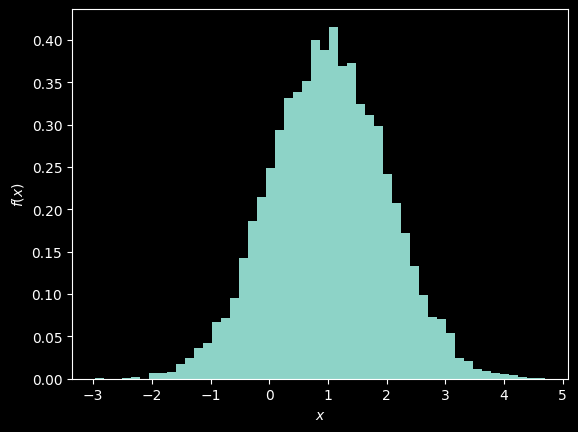

In [8]:
mu, sigma = 1, 1

s = np.random.normal(mu, sigma, 10000)
plt.hist(s, 50, density = True)
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.show()

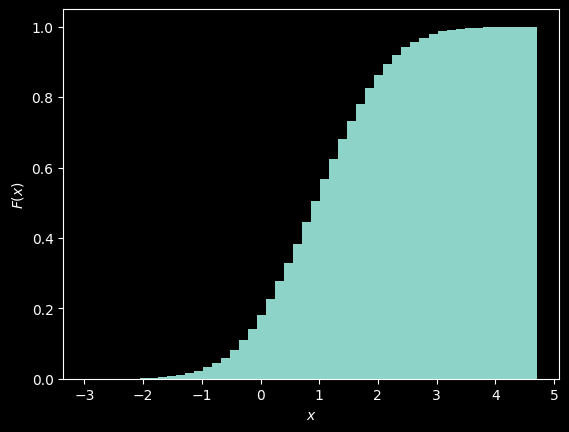

In [9]:
## Cumulative distribution
plt.hist(s, 50, density = True, cumulative = True)
plt.ylabel("$F(x)$")
plt.xlabel("$x$")
plt.show()

# Teorema del límite central

**Teorema del limite central:**

La media aritmética o suma de variables (i.i.d) aleatorias independientes y igualmente distribuidas es aproximadamente una distribución normal.

**Ejemplo:** Lanzamiento de una moneda, 0 o 1

1. Lance 100 veces una moneda cuya cara tiene un valor de 0 (cero) y cuyo sello tiene un valor de 1
(uno).
2. Sume la cantidad de ceros y unos en esos 100 lanzamientos.
3. Guarde el resultado de esa suma.
4. Repita los 100 lanzamientos 200 veces de modo que al final tenga 200 sumas diferentes.
5. Imprima en la terminal el valor promedio de los 200 resultados obtenidos.

## Ejemplo: metodo 1

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   1.   1.   3.   0.   3.  10.   9.  27.  43.  96. 105. 155. 217.
 279. 381. 479. 567. 701. 729. 771. 769. 781. 753. 671. 572. 475. 408.
 316. 248. 154. 107.  54.  48.  21.  19.  14.   9.   2.   1.   0.   0.
   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.]


<StemContainer object of 3 artists>

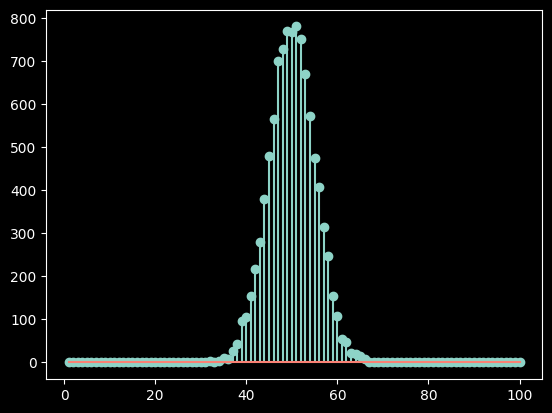

In [15]:
num_exps = 10000
num_lanzamientos = 100

total_exps = np.zeros(num_lanzamientos)
for j in range(num_exps):
  num_tails = 0
  res_exp = np.zeros(num_lanzamientos)
  for i in range(num_lanzamientos):
    res_exp[i] += np.random.randint(2)
  total_exps[int(res_exp.sum())-1] += 1

total_exps
print(total_exps)

plt.stem(np.arange(num_lanzamientos)+ 1, total_exps)

<ipython-input-18-8f4124e905d3>:15: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(x + 1, y, use_line_collection = True)


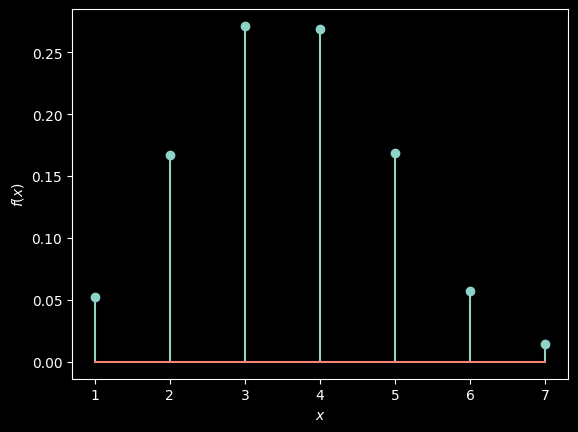

In [18]:
## the distribution correspond to a binomial distribution

num_exps = 10000
num_lanzamientos = 7

x = np.arange(0, num_lanzamientos)
y = np.zeros(num_lanzamientos)
n = num_lanzamientos
p = 0.5
uni_dist = np.random.binomial(n, p, num_exps)
for value in uni_dist:
    y[value-1] += 1
y /= num_points

plt.stem(x + 1, y, use_line_collection = True)
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.show()

Taking the average of multiple experiments corresponds to a Gaussian distribution from the central limit theorem

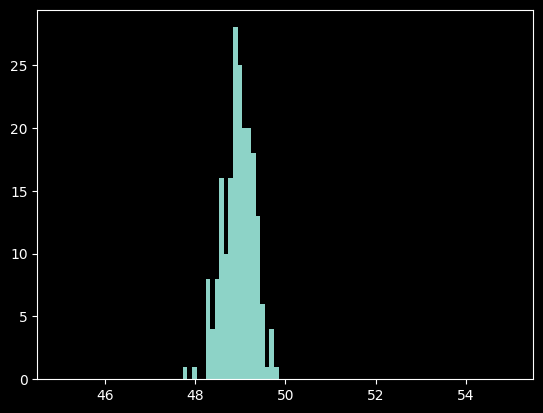

In [37]:
num_exps = 200
num_lanzamientos = 100
num_averages = 200

total_averages  = np.zeros(num_averages)
for k in range(num_averages):
  total_exps = np.zeros(num_lanzamientos)
  for j in range(num_exps):
    num_tails = 0
    res_exp = np.zeros(num_lanzamientos)
    for i in range(num_lanzamientos):
      res_exp[i] += np.random.randint(2)
    total_exps[int(res_exp.sum())-1] += 1
  total_averages[k] = np.dot(total_exps, np.arange(num_lanzamientos)) / num_exps

plt.hist(total_averages, bins = np.linspace(45, 55, 100))
plt.show()

## Ejemplo: metodo 2

50.0865 4.884671713636445


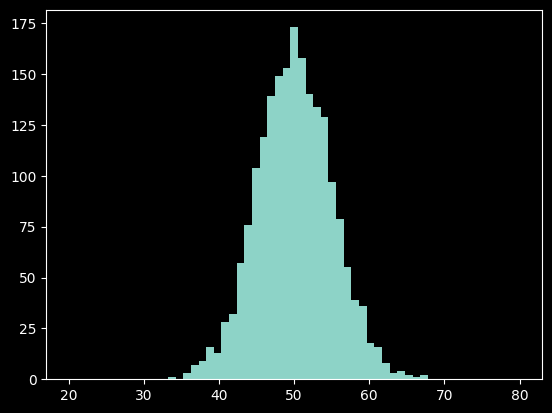

In [20]:
def rolling():
    lanzamientos = []
    for i in range(100):
        rand_num = np.random.randint(0,2)
        lanzamientos.append(rand_num)

    zeros, ones = 100 - sum(lanzamientos), sum(lanzamientos)

    return zeros, ones


def n_rollings(n_rollings):
    rollings = np.zeros(n_rollings)
    for i in range(len(rollings)):
        rollings[i] = rolling()[1]
    return rollings

rollings = n_rollings(2000)

plt.hist(rollings, np.linspace(20, 80, 60))

print(rollings.mean(), rollings.std())

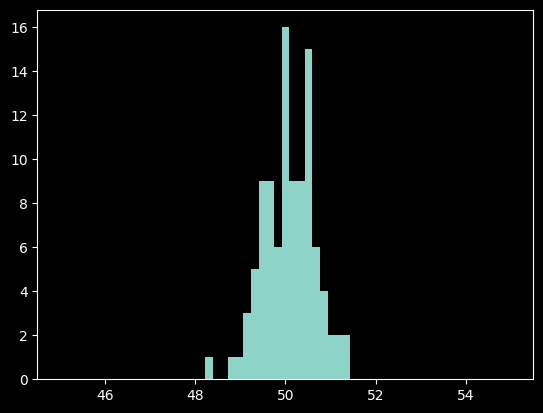

50.0818 0.5572672249468835


In [21]:
def n_rollings(n_rollings, n_means):
    rollings_means = np.zeros(n_means)
    for j in range(n_means):
        rollings = np.zeros(n_rollings)
        for i in range(len(rollings)):
            rollings[i] = rolling()[1]
        rollings_means[j] = rollings.mean()
    return rollings_means

rollings_means = n_rollings(100, 100)

plt.hist(rollings_means, np.linspace(45, 55, 60))
plt.show()

print(rollings_means.mean(), rollings_means.std())

In [29]:
 5.067044108748216 / np.sqrt(100)

0.5067044108748215

# P-value

**p-value:** Considere una $\bar{X}$ el promedio de una muestra de $n$ datos que viene de una distribución de $\mu$ desconocida y $\sigma$ conocida. Se quiere probar la hipotesis de que $\bar{X}$ tiene viene de una distribución con promedio $\mu_0$. Sea $\Phi(x)$ la función acumulativa de la función normal $\mathcal{N}(0, 1)$. El p-value se define como,

\begin{equation}
    2*\Phi(\Big|\frac{\bar{X}-\mu_o}{\sigma/\sqrt{n}}\Big|)
\end{equation}


In [30]:
import numpy as np
from scipy.stats import norm
import scipy.stats as stats

miu = 8.2
sigma = 0.02
sample = [8.18, 8.17, 8.16, 8.15, 8.17, 8.21, 8.16, 8.19, 8.18]
n_sample = len(sample)
miu_sample = sum(sample) / n_sample

miu_sample


8.174444444444443

In [31]:
p_value = 2 * norm.cdf(miu_sample, loc = miu, scale = sigma/np.sqrt(n_sample))

p_value

0.00012641846373677117

In [32]:
alpha = 0.05 # nivel de significancia

conclusion = "Dado que el p-value es menor que el valor de significancia el promedio no corresponde"
print(conclusion)

Dado que el p-value es menor que el valor de significancia el promedio no corresponde


In [33]:
z = (miu_sample - 8.2) / (sigma/np.sqrt(n_sample))

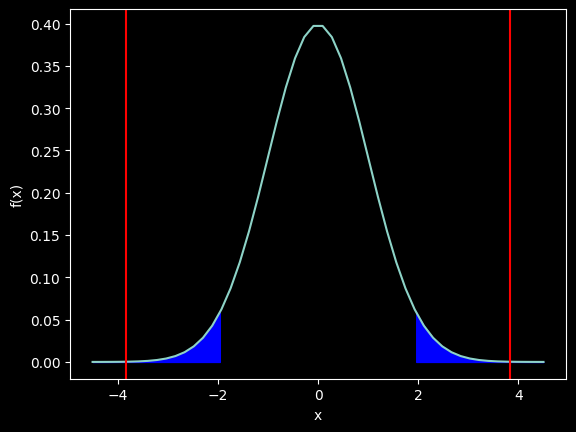

In [34]:
import matplotlib.pyplot as plt
x = np.linspace(-4.5, 4.5)
y = stats.norm.pdf(x, 0, 1)
plt.plot(x, y)
x2 = np.linspace(1.96, 4.5, 50)
y2 = stats.norm.pdf(x2, 0, 1)
plt.fill_betweenx(y2,x2, 1.96, color = "blue")
x3 = np.linspace(-4.5, -1.96, 50)
y3 = stats.norm.pdf(x3, 0, 1)
plt.fill_betweenx(y3,x3, -1.96, color = "blue")
plt.axvline(x=z, color = "red")
plt.axvline(x=-z, color = "red")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

# Calculo de valor esperado y varianza

In [35]:
x = np.array([0, 1, 1, 1, 2, 2, 2, 3])

ex = 0
for i in range(len(x)):
  ex += x[i]

ex /= len(x)

ex, x.mean()

(1.5, 1.5)

In [36]:
var_x = 0

for i in range(len(x)):
  var_x += (x[i] - ex)**2

var_x /= len(x)
std_x = np.sqrt(var_x)

var_x, std_x, x.var(), x.std()

(0.75, 0.8660254037844386, 0.75, 0.8660254037844386)